In [1]:
# Recarrega os imports a cada execução
%load_ext autoreload
%autoreload 2

# 1 - Regressão Linear com uma Variável

## 1.1 Visualização dos dados

In [2]:
import os
os.getcwd()

'D:\\Documentos\\Estudo\\CEFET\\6Periodo\\Aprendizado de Maquina\\T1\\ml-class\\ml-t1'

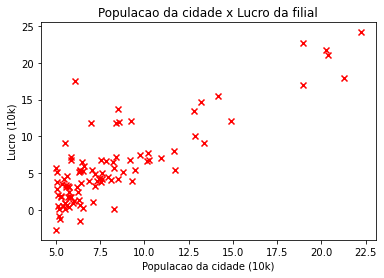

In [3]:
from plot_ex1data1 import importarDados,plot

ex1data1_path = '/data/ex1data1.txt'
ex1data1_cols = ['populacao','lucro']
X, y = importarDados(ex1data1_path,ex1data1_cols)
plot()

Através desse gráfico, podemos reparar uma clara tendência em relação ao crescimento da população da cidade com o lucro obtido.

## 1.2 - Gradiente Descendente

In [4]:
import numpy as np

Para conseguir fazer o produto escalar das duas matrizes e calcular seu custo, precisamos antes igualar suas dimensões.

In [5]:
X.shape

(97, 1)

In [6]:
if X.shape[1] == 1:
    X = np.c_[np.ones(len(X)), X]

Antes de executar o algoritmo de gradiente descendente para otimizar os parâmetros, vamos fazer testar quanto está o custo. Para isso, precisamos antes definir o theta como uma matriz com apenas duas linhas contendo zeros.

In [7]:
theta = np.array([0,0], ndmin=2).T
theta

array([[0],
       [0]])

In [8]:
from custo_reglin_uni import custo_reglin_uni

custo_reglin_uni(X,y,theta)

32.072733877455676

Aplicando o gradiente descendente:

In [9]:
from gd_reglin_uni import gd_reglin_uni

custo, theta = gd_reglin_uni(X, y, 0.02, 1000)
print(custo)

4.478020743321126


No código acima, é chamada a função que implementa o algoritmo de gradiente descendente, nele é passado o parâmetros:
 * X - Array que contém os valores da única feature (população da cidade)
 * y - Array contendo o target (lucro)
 * alpha=0.02 - Taxa de aprendizado do algoritmo, que representa é diretamente proporcional ao passo que o algoritmo dará. Valores grandes demais podem implicar em extrapolar o ponto de mínimo, fazendo o efeito oposto ao objetivado, enquanto valores pequenos demais podem fazer o algoritmo não chegar ao mínimo.
 * epochs=1000 - Quantidade de vezes(passos) que o algoritmo executará.

## 1.3 - Visualização de J

#### Vamos visualizar a reta projetada:

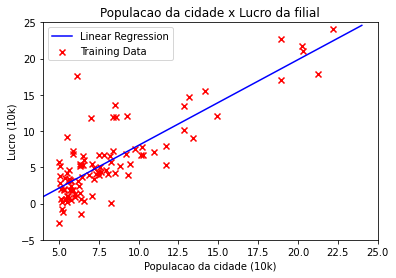

<Figure size 432x288 with 0 Axes>

In [10]:
from visualizar_reta import plot

plot(ex1data1_path, theta)

In [11]:
def predict(value, theta):
    y_predicted = theta[0] + value*theta[1]
    return y_predicted[0].round(2)

In [12]:
print(f" Para uma cidade com 35k habitantes, o lucro seria {predict(3.5, theta) * 10000}.")
print(f" Já uma cidade com 70k habitantes, o lucro seria {predict(7, theta) * 10000}.")

 Para uma cidade com 35k habitantes, o lucro seria 3500.0.
 Já uma cidade com 70k habitantes, o lucro seria 44900.0.


#### Visualização dos custos para diferentes valores de theta:

D:\Documentos\Estudo\CEFET\6Periodo\Aprendizado de Maquina\T1\ml-class\ml-t1\visualizar_J_contour.py:27: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(theta0, theta1, J, levels=np.logspace(-1, 4, 20), color='blue')


<Figure size 432x288 with 0 Axes>

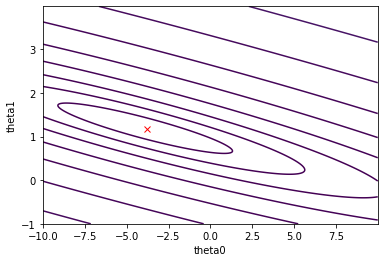

<Figure size 432x288 with 0 Axes>

In [13]:
from visualizar_J_contour import plot

J = plot(X,y,theta)

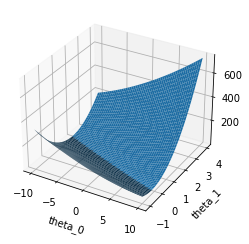

<Figure size 432x288 with 0 Axes>

In [14]:
from visualizar_J_surface import plot
plot(J)

##

# 2 - Regressão Linear com múltiplas variáveis

## 2.1 -  Normalização de características

In [15]:
from plot_ex1data2 import importarDados

ex1data2_path = '/data/ex1data2.txt'
ex1data2_cols = ['tamanho','dormitorios','preco']
X, y = importarDados(ex1data2_path)

In [16]:
from normalizacao import normalizar_caracteristica

X_norm, mean_X_norm, std_X_norm = normalizar_caracteristica(X)
print("Visualizando as 10 primeiras observações:")
X_norm[:10,:]

Visualizando as 10 primeiras observações:


array([[ 1.        ,  0.13141542, -0.22609337],
       [ 1.        , -0.5096407 , -0.22609337],
       [ 1.        ,  0.5079087 , -0.22609337],
       [ 1.        , -0.74367706, -1.5543919 ],
       [ 1.        ,  1.27107075,  1.10220517],
       [ 1.        , -0.01994505,  1.10220517],
       [ 1.        , -0.59358852, -0.22609337],
       [ 1.        , -0.72968575, -0.22609337],
       [ 1.        , -0.78946678, -0.22609337],
       [ 1.        , -0.64446599, -0.22609337]])

A função funciona para diversos números de features e exemplos pois para rescala cada feature com base na subtração seguida da divisão pelo seu desvio padrão. O pacote numpy permite fazer isso de forma matricial, independente da quantidade colunas e linhas existentes.

## 2.2 - Gradiente descendente

In [17]:
from custo_reglin_multi import custo_reglin_multi
from gd_reglin_multi import gd

O suporte a qualquer número de características se da por conta da utilização do pacote numpy que permite o cálculo o armazenamento das features de cada observação de forma vetorial e todos os cálculos de forma matricial

# 3 - Regressão Logística

## 3.1 - Visualização dos dados

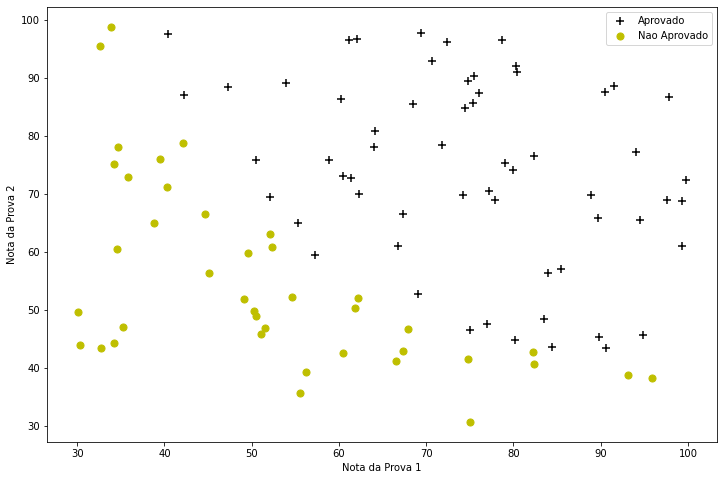

In [18]:
from plot_ex2data1 import importarDados,plot

ex2data1_path = '/data/ex2data1.txt'
data, X, y = importarDados()
plot(data)

## 3.2 - Implementação

### 3.2.1 - Função sigmoide

In [19]:
from sigmoide import sigmoide

In [20]:
values = np.array([0,999,-999])
sigmoide(values)

D:\Documentos\Estudo\CEFET\6Periodo\Aprendizado de Maquina\T1\ml-class\ml-t1\sigmoide.py:5: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-z))


array([0.5, 1. , 0. ])

Podemos ver que a função retorna conforme o esperado: 0,5 quando recebe 0; 1 para valores positivamente altos; e 0 para valores negativamente baixos

### 3.2.2 - Função de custo e gradiente

In [21]:
from custo_reglog import custo_reglog

In [22]:
theta = np.zeros(3)

In [23]:
custo_reglog(theta,X, y)

0.6931471805599453

Custo antes da otimização

### 3.2.3 - Aprendizado dos parâmetros

In [24]:
from gd_reglog import gd_reglog
import scipy.optimize as opt

grad = gd_reglog(theta, X, y)
grad

array([ -0.1       , -12.00921659, -11.26284221])

In [25]:
result = opt.fmin_tnc(func=custo_reglog, x0=theta, fprime=gd_reglog, args=(X, y))
print(f"Custo mínimo obtido: {custo_reglog(result[0], X,y)}")
theta_min = result[0]
print(f"Os valores de theta que minimiza a função de custo é: {theta_min}")

Custo mínimo obtido: 0.20349770158947425
Os valores de theta que minimiza a função de custo é: [-25.16131872   0.20623159   0.20147149]


Usando o otimizador do scipy, achamos o mínimo para a função de custo da regressão logística através do método de Newton.

### 3.2.4 - Avaliação do modelo

In [26]:
from predizer_aprovacao import predizer,acuracia

In [27]:
notas_teste = np.array([1,45,85], ndmin=2)
notas_teste

array([[ 1, 45, 85]])

In [28]:
predizer(theta_min,notas_teste)

[1]

In [29]:
pred = sigmoide(notas_teste * np.matrix(theta_min).T)
pred

matrix([[0.77629063]])

In [30]:
acuracia(X,y,result)

89

Para as notas 45 e 85, obtivemos a previsão de que o aluno foi aprovado com 77% de acurácia. Em relação a acúracia para o modelo como um todo para o conjunto de dados de treinamento, obtivemos 89%

# 4 - Regressão Logística com Regularização

## 4.1 - Visualização dos Dados

In [31]:
from plot_ex2data2 import importarDados, plot

In [32]:
data, X, y = importarDados(insertOnes=False)

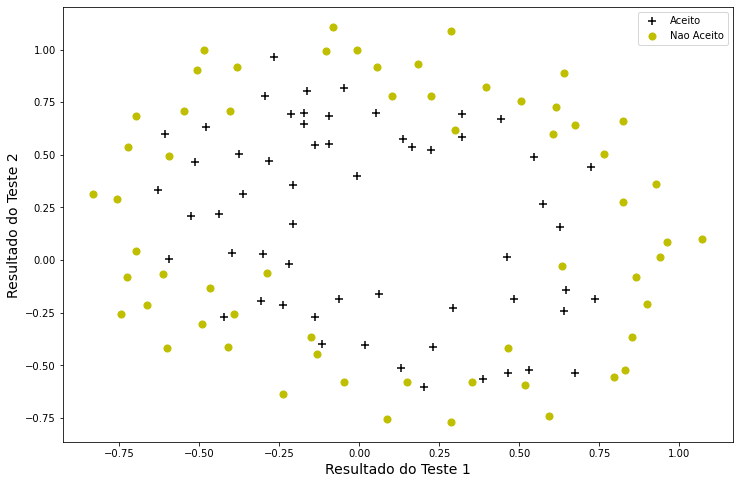

In [33]:
plot(data)

## 4.2 - Feature mapping

In [34]:
from mapFeature import mapFeature

X = mapFeature(X[:,0],X[:,1],6)

In [35]:
X.shape

(118, 28)

Após a combinação das fetures de forma polinomial, obtivemos 28 features

## 4.3 - Função de custo e gradiente

In [36]:
from costFunctionReg import costFunctionReg

In [37]:
theta = np.zeros(X.shape[1])

In [38]:
custo, grad = costFunctionReg(theta, X, y, 1)
custo

0.6931471805599454

In [39]:
custo, grad = costFunctionReg(theta, X, y, 0)
custo

0.6931471805599454

In [40]:
custo, grad = costFunctionReg(theta, X, y, 100)
custo

0.6931471805599454

O custo não se alterou com a mudança do valor do coeficiente de regularização, pois ele multiplica o termo de regularização e, como o termo de regularização busca aumentar o custo da função com base nos valores de theta, com os thetas zerados, o termo de regularização também será zero. Sendo assim, nesse caso específico dos valores de theta estarem zerados, a mudança do lambda não afeta a função de custo.

In [41]:
res = opt.minimize(costFunctionReg, theta, args = (X, y, 1), jac=True, method='TNC', options={'maxiter': 1000})

In [42]:
theta_min = res.x
theta_min

array([ 1.25441475,  0.62276785,  1.19242766, -2.00505523, -0.87290733,
       -1.36184255,  0.12573867, -0.3553686 , -0.35603634, -0.17096339,
       -1.45784659, -0.06683336, -0.61498639, -0.25080293, -1.18096018,
       -0.22566837, -0.2056289 , -0.06382327, -0.27187024, -0.27659006,
       -0.46835985, -1.03247355,  0.01627586, -0.29695278,  0.00581071,
       -0.32631631, -0.12073391, -0.93023003])

## 4.4 - Esboço da fronteira de decisão

D:\Documentos\Estudo\CEFET\6Periodo\Aprendizado de Maquina\T1\ml-class\ml-t1\plotDecisionBoundary.py:29: UserWarning: No contour levels were found within the data range.
  plt.contour(T1, T2, Z, levels=[0], linewidths=2, colors='g',alpha=0.8)


Text(0.5, 1.0, 'Fronteira de decisão')

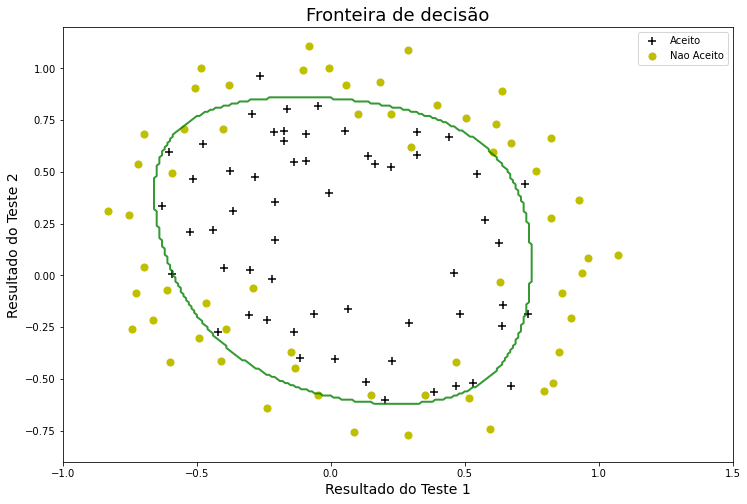

In [43]:
from plotDecisionBoundary import plot
import matplotlib.pyplot as plt

plot(data, theta_min)
plt.xlim((-1,1.5))
plt.ylim((-0.9,1.2))
plt.title("Fronteira de decisão", fontsize=18)

# 5 - Regressão Linear com Regularização

## 5.1 - Visualização dos Dados

In [44]:
from plot_ex5data1 import importarDados, plot

In [45]:
X, y, Xval, yval, Xtest, ytest = importarDados(insertOnes=True)

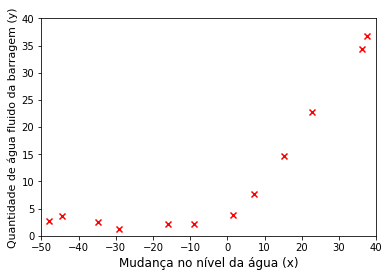

In [46]:
plot(X[:,1],y)

## 5.2 - Função de custo da regressão linear regularizada

In [47]:
from linearRegCostFunction import linearRegCostFunction

In [48]:
theta = np.ones(2)
custo, gradiente = linearRegCostFunction(X, y, theta, 1)
custo

303.9931922202643

## 5.3 Gradiente na regressão linear regularizada

In [49]:
gradiente

array([-15.30301567, 598.25074417])

## 5.4 Ajustando os parâmetros da regressão linear

In [50]:
from optimize_and_plot_linearReg import optimize_and_plot_linearReg
from plot_ex5data1 import plot

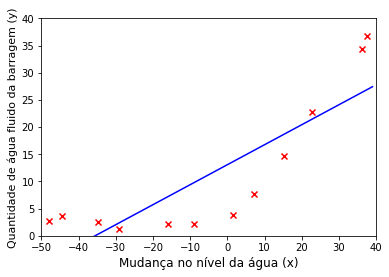

In [51]:
theta_min = optimize_and_plot_linearReg(X, y, theta, 0, 1000)

# 6 - Viés-Variância

# 7 - Regressão Polinomial

In [52]:
from poly_features import poly_features

In [53]:
X_poly = poly_features(X[:,1],8)
X_poly = np.c_[np.ones(X_poly.shape[0]),X_poly]

## 7.1 - Regressão Polinomial - aprendizado

In [54]:
X_norm, mean_X, std_X = normalizar_caracteristica(X_poly)

D:\Documentos\Estudo\CEFET\6Periodo\Aprendizado de Maquina\T1\ml-class\ml-t1\normalizacao.py:7: RuntimeWarning: invalid value encountered in true_divide
  X_norm = (X - mean_X) / std_X


In [536]:
theta = np.zeros(X_norm.shape[0])
optimize_and_plot_linearReg(X_norm, y, theta, 0, epochs=1000)

ValueError: shapes (12,10) and (12,) not aligned: 10 (dim 1) != 12 (dim 0)